In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape (60000, 28, 28)


In [11]:
model = tf.keras.models.Sequential([    
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu), 
    tf.keras.layers.Dropout(rate=0.2), 
    tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax)
])

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.sparse_categorical_crossentropy, 
              metrics=["accuracy"])

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
r = model.fit(x=x_train, y=y_train, epochs=10, 
              validation_data=(x_test, y_test), 
              use_multiprocessing=True)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4727 - accuracy: 0.8611 - val_loss: 0.1384 - val_accuracy: 0.9566
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1494 - accuracy: 0.9566 - val_loss: 0.0961 - val_accuracy: 0.9701
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1069 - accuracy: 0.9685 - val_loss: 0.0891 - val_accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0862 - accuracy: 0.9726 - val_loss: 0.0866 - val_accuracy: 0.9726
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0725 - accuracy: 0.9778 - val_loss: 0.0749 - val_accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0621 - accuracy: 0.9804 - val_loss: 0.0714 - val_accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0558 - accuracy: 0.9816 - val_loss: 0.0725 - val_accuracy:

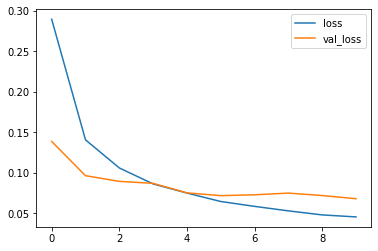

In [15]:
import matplotlib.pyplot as plt

plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

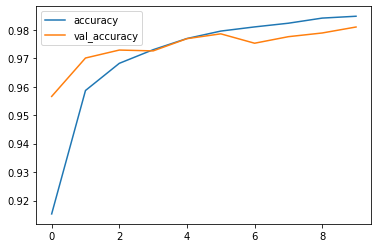

In [16]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [17]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0677 - accuracy: 0.9810
[0.06766384094953537, 0.9810000061988831]


In [18]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

Confusion matrix, without normalization
[[ 973    0    0    1    0    0    1    1    3    1]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   5    2 1009    1    3    0    1    6    5    0]
 [   1    1    3  993    0    4    0    4    4    0]
 [   2    1    3    0  967    0    3    0    1    5]
 [   2    0    0    8    2  873    2    1    3    1]
 [   3    3    0    1    4    4  942    0    1    0]
 [   2    7    9    2    2    0    0 1003    1    2]
 [   5    1    2    2    4    9    1    3  942    5]
 [   0    3    0    5    7    2    1    7    2  982]]


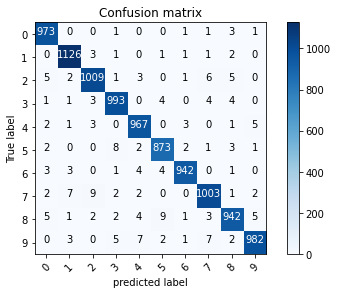

In [20]:
def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title="Confusion matrix", 
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                 horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("predicted label")
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

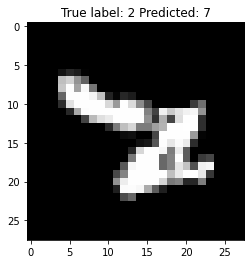

In [22]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))
plt.show()